In [1]:
import pyodbc 
import pandas as pd
import numpy as np

##importing the Visualisations
import matplotlib.pyplot as plt
from datetime import datetime as dt
from pandas import Series
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')


years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month


cnxn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                        "Server=LAPTOP-KNCT3R7K;"
                        "Database=DBASQLADMIN;"
                      #  "uid=User;pwd=password")
                         "Trusted_Connection=yes;")
df = pd.read_sql_query("SELECT id, price,TimeStamp FROM [DBASQLADMIN].[dbo].[dprice]", cnxn)

In [2]:
#df.dropna(inplace =True)
df.drop(['id'],inplace =True, axis=1)

In [3]:
df.head(20)

,price,TimeStamp
0,1,2017-03-28 08:07:00
1,2,2017-03-29 08:07:00
2,3,2017-03-30 08:07:00
3,4,2017-03-31 08:07:00
4,5,2017-04-01 08:07:00
5,6,2017-04-02 08:07:00
6,7,2017-04-03 08:07:00
7,8,2017-04-04 08:07:00
8,9,2017-04-05 08:07:00
9,10,2017-04-06 08:07:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 2 columns):
price        599 non-null int64
TimeStamp    599 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 9.4 KB


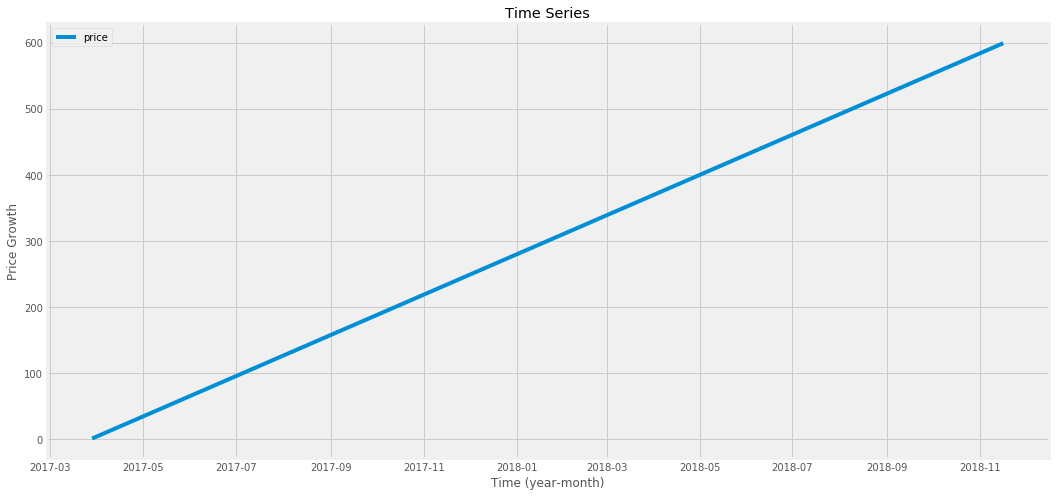

In [5]:
df.index = df['TimeStamp']
ts = df['price']
plt.figure(figsize = (16,8))
plt.plot(ts)
plt.title("Time Series")
plt.xlabel("Time (year-month)")
plt.ylabel("Price Growth")
plt.legend(loc = 'best')

In [6]:
for i in (df):
    df['year'] = df['TimeStamp'].dt.year
    df['month'] = df['TimeStamp'].dt.month
    df['day']= df['TimeStamp'].dt.day
    df['Hour']=df['TimeStamp'].dt.hour

In [7]:
df['Day of week'] = df['TimeStamp'].dt.dayofweek

In [8]:
#ts = df['price']

#df['Rolling_Mean'] = df['price'].rolling(window = 30,min_periods=1).mean()  ##window will reduce outliers

# Let's plot the 12-Month Moving Rolling Mean & Variance and find Insights
# Rolling Statistics
df['Rolling_Mean'] = ts.rolling(window=12,min_periods=1).mean()
df['rolvar'] = ts.rolling(window=12,min_periods=1).std()



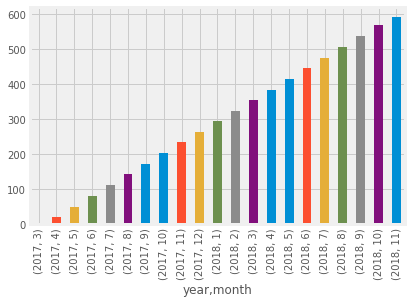

In [9]:
#review mean() growth year by month
df.groupby(['year', 'month'])['price'].mean().plot.bar()

In [10]:
df.head(20)

,price,TimeStamp,year,month,day,Hour,Day of week,Rolling_Mean,rolvar
TimeStamp,,,,,,,,,
2017-03-28 08:07:00,1,2017-03-28 08:07:00,2017,3,28,8,1,1.0,NaN
2017-03-29 08:07:00,2,2017-03-29 08:07:00,2017,3,29,8,2,1.5,0.707107
2017-03-30 08:07:00,3,2017-03-30 08:07:00,2017,3,30,8,3,2.0,1.000000
2017-03-31 08:07:00,4,2017-03-31 08:07:00,2017,3,31,8,4,2.5,1.290994
2017-04-01 08:07:00,5,2017-04-01 08:07:00,2017,4,1,8,5,3.0,1.581139
2017-04-02 08:07:00,6,2017-04-02 08:07:00,2017,4,2,8,6,3.5,1.870829
2017-04-03 08:07:00,7,2017-04-03 08:07:00,2017,4,3,8,0,4.0,2.160247
2017-04-04 08:07:00,8,2017-04-04 08:07:00,2017,4,4,8,1,4.5,2.449490
2017-04-05 08:07:00,9,2017-04-05 08:07:00,2017,4,5,8,2,5.0,2.738613


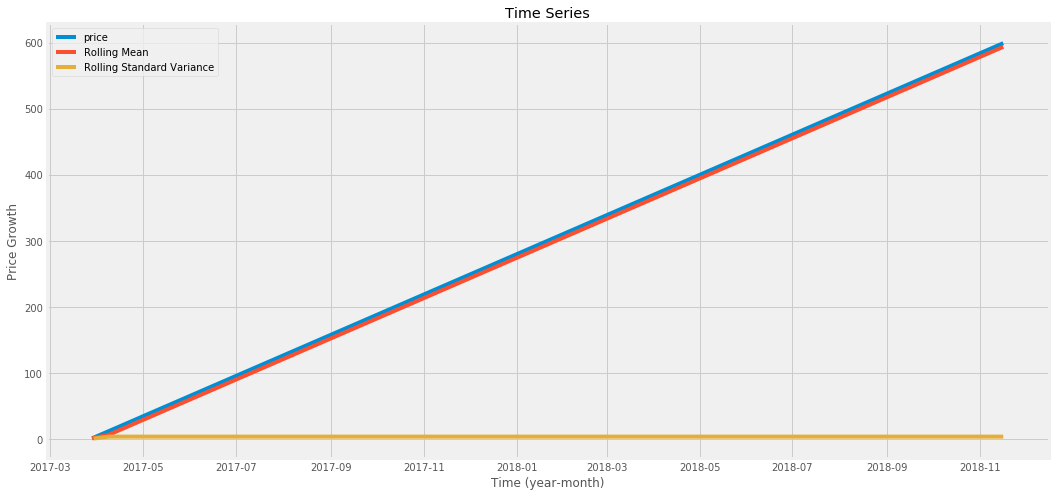

In [11]:
df.index = df['TimeStamp']
ts = df['price']
rm = df['Rolling_Mean']
rv = df['rolvar']
plt.figure(figsize = (16,8))
plt.plot(ts)
plt.plot(rm,label='Rolling Mean')
plt.plot(rv, label='Rolling Standard Variance')
plt.title("Time Series")
plt.xlabel("Time (year-month)")
plt.ylabel("Price Growth")
plt.legend(loc = 'best')

In [12]:
train = df[(df['TimeStamp'] > '2017-03-28') & (df['TimeStamp'] <= '2018-08-01')]
valid = df[(df['TimeStamp'] >= '2018-08-01') & (df['TimeStamp'] <= '2018-11-16')]
#train = train.ix['2012-08-25':'2014-06-24']
#valid = train.ix['2014-06-25':'2014-09-25']

In [30]:
dd = np.asarray(train.price)
y_hat =valid.copy()
y_hat['naive']= dd[len(dd)- 1]
y_hat.head(10)

,price,TimeStamp,year,month,day,Hour,Day of week,Rolling_Mean,rolvar,naive
TimeStamp,,,,,,,,,,
2018-08-01 08:07:00,492,2018-08-01 08:07:00,2018,8,1,8,2,486.5,3.605551,491
2018-08-02 08:07:00,493,2018-08-02 08:07:00,2018,8,2,8,3,487.5,3.605551,491
2018-08-03 08:07:00,494,2018-08-03 08:07:00,2018,8,3,8,4,488.5,3.605551,491
2018-08-04 08:07:00,495,2018-08-04 08:07:00,2018,8,4,8,5,489.5,3.605551,491
2018-08-05 08:07:00,496,2018-08-05 08:07:00,2018,8,5,8,6,490.5,3.605551,491
2018-08-06 08:07:00,497,2018-08-06 08:07:00,2018,8,6,8,0,491.5,3.605551,491
2018-08-07 08:07:00,498,2018-08-07 08:07:00,2018,8,7,8,1,492.5,3.605551,491
2018-08-08 08:07:00,499,2018-08-08 08:07:00,2018,8,8,8,2,493.5,3.605551,491
2018-08-09 08:07:00,500,2018-08-09 08:07:00,2018,8,9,8,3,494.5,3.605551,491


Text(0.5,1,'Naive Forecast')

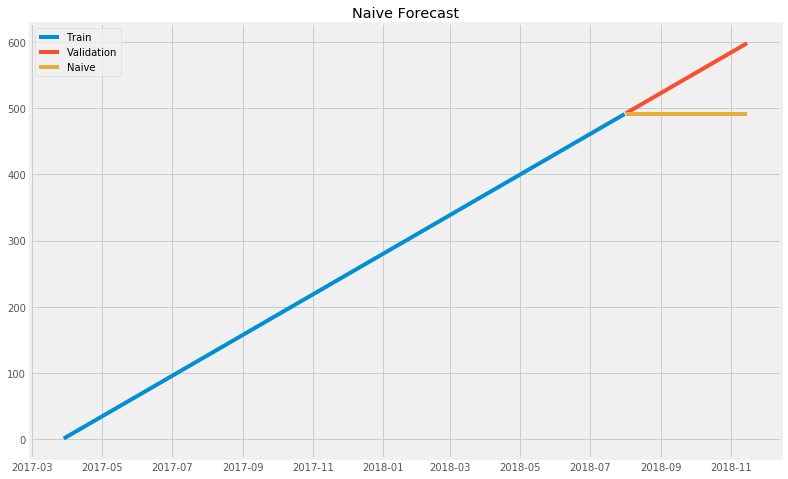

In [31]:
plt.figure(figsize = (12,8))
plt.plot(train.index, train['price'],label = 'Train')
plt.plot(valid.index, valid['price'], label = 'Validation')
plt.plot(y_hat.index, y_hat['naive'],  label = 'Naive')
plt.legend(loc = 'best')
plt.title('Naive Forecast')

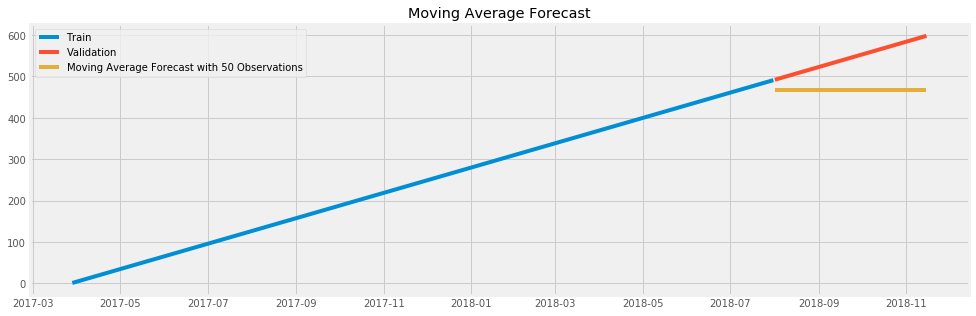

In [35]:
y_hat_avg = valid.copy()
y_hat_avg['moving_average_forecast']= train['price'].rolling(50).mean().iloc[-1]
plt.figure(figsize = (15,5))
plt.plot(train['price'], label = 'Train')
plt.plot(valid['price'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'], label = "Moving Average Forecast with 50 Observations")
plt.legend(loc = 'best')
plt.title('Moving Average Forecast')
plt.show()

## Model evaluation metrics for regression

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

The **three common evaluation metrics** for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$


**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$


**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**Calculate RMS Error for Naive Approach**

In [28]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(valid.price, y_hat.naive))
rmse

62.20932405998316

Text(0.5,1,'Simple Exponential Smoothing Forecast')

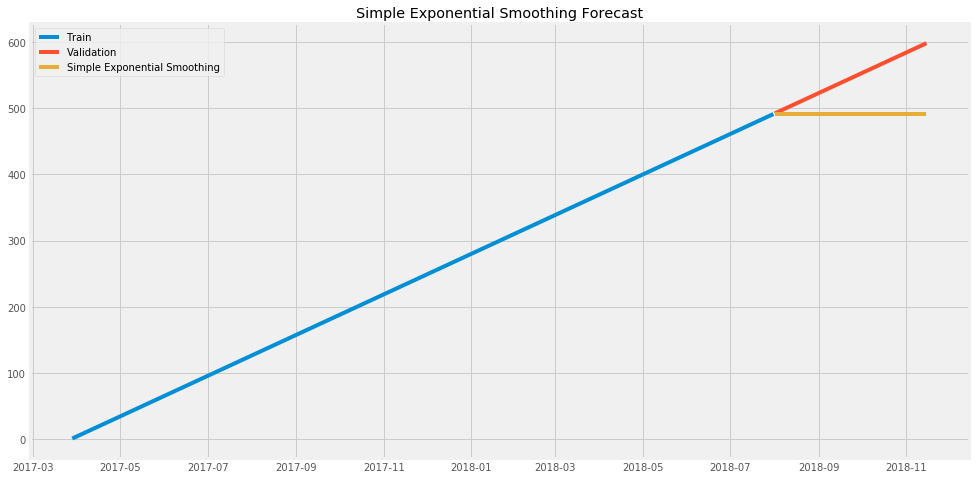

In [34]:
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing, Holt

y_hat = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['price'])).fit(smoothing_level = 0.6,optimized = False)
y_hat['SES'] = fit2.forecast(len(valid))
plt.figure(figsize =(15,8))
plt.plot(train['price'], label = 'Train')
plt.plot(valid['price'], label = 'Validation')
plt.plot(y_hat['SES'], label = 'Simple Exponential Smoothing')
plt.legend(loc = 'best')
plt.title('Simple Exponential Smoothing Forecast')

**Holt's Linear Trend Model**

<Figure size 1600x800 with 0 Axes>

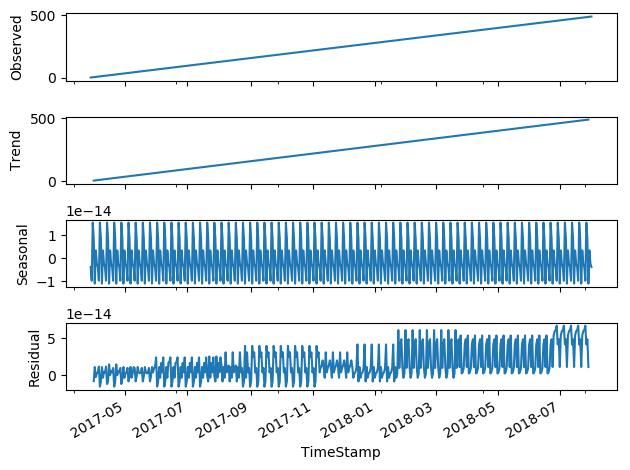

In [36]:
plt.style.use('default')
plt.figure(figsize = (16,8))
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.price).plot()
result = sm.tsa.stattools.adfuller(train.price)
plt.show()

Text(0.5,1,'Holt Linear Forecast')

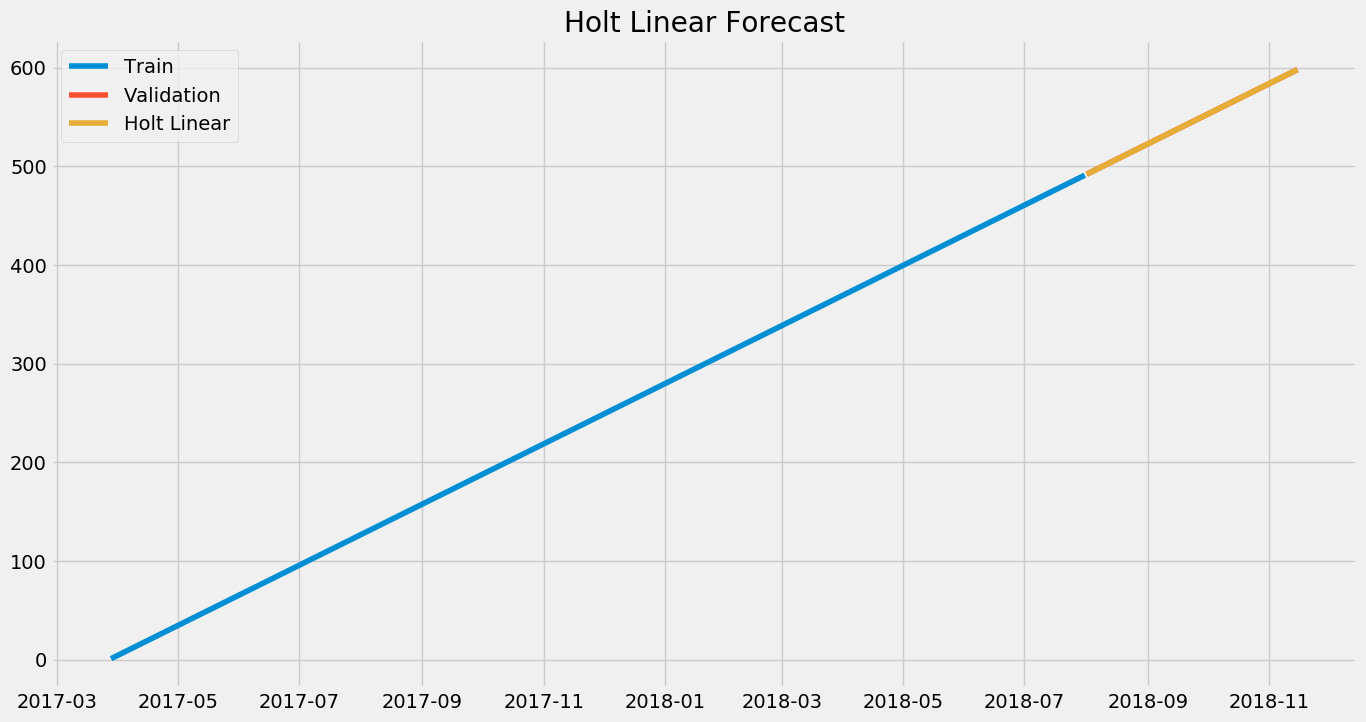

In [39]:
y_hat_holt = valid.copy()
fit1 = Holt(np.asarray(train['price'])).fit(smoothing_level = 0.3, smoothing_slope = 0.1)
y_hat_holt['Holt_linear'] = fit1.forecast(len(valid))
plt.style.use('fivethirtyeight')
plt.figure(figsize = (15,8))
plt.plot(train.price, label = 'Train')
plt.plot(valid.price, label = 'Validation')
plt.plot(y_hat_holt['Holt_linear'], label = 'Holt Linear')
plt.legend(loc = 'best')
plt.title('Holt Linear Forecast')

Text(0.5,1,'Holt Winter Forecast')

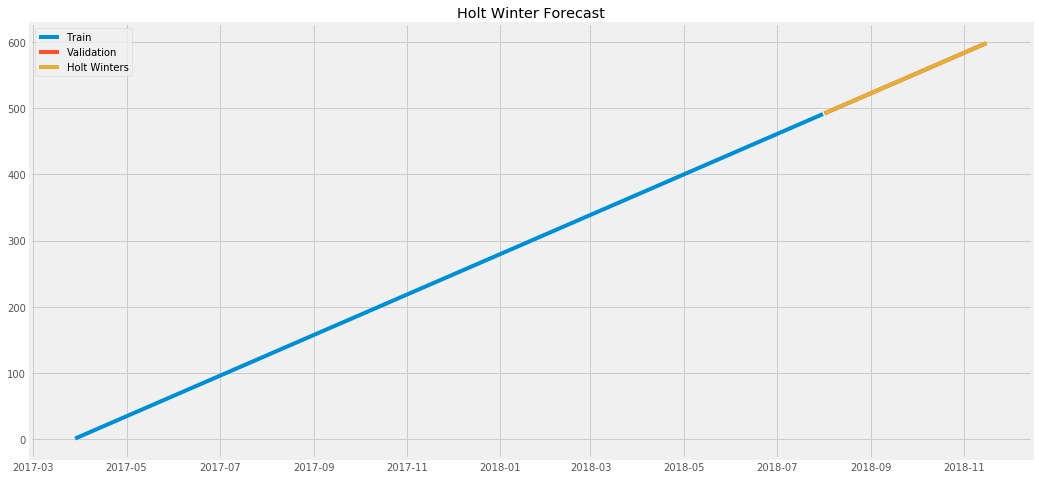

In [29]:
#from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing, Holt
y_hat_avg = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(train['price']), seasonal_periods= 4, trend = 'add', seasonal= 'add').fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid))
plt.figure(figsize = (16,8))
plt.plot(train['price'], label = 'Train')
plt.plot(valid['price'], label = 'Validation')
#plt.plot(y_hat_avg.Holt_Winter, label = 'Holt Winters')
plt.plot(y_hat_avg['Holt_Winter'], label = 'Holt Winters')
plt.legend(loc = 'best')
plt.title('Holt Winter Forecast')

In [21]:
y_hat_avg.head(20)

,price,TimeStamp,year,month,day,Hour,Day of week,Rolling_Mean,rolvar,Holt_Winter
TimeStamp,,,,,,,,,,
2018-08-01 08:07:00,492,2018-08-01 08:07:00,2018,8,1,8,2,486.5,3.605551,492.000000
2018-08-02 08:07:00,493,2018-08-02 08:07:00,2018,8,2,8,3,487.5,3.605551,493.000000
2018-08-03 08:07:00,494,2018-08-03 08:07:00,2018,8,3,8,4,488.5,3.605551,494.000000
2018-08-04 08:07:00,495,2018-08-04 08:07:00,2018,8,4,8,5,489.5,3.605551,495.000000
2018-08-05 08:07:00,496,2018-08-05 08:07:00,2018,8,5,8,6,490.5,3.605551,496.000000
2018-08-06 08:07:00,497,2018-08-06 08:07:00,2018,8,6,8,0,491.5,3.605551,497.000000
2018-08-07 08:07:00,498,2018-08-07 08:07:00,2018,8,7,8,1,492.5,3.605551,498.000000
2018-08-08 08:07:00,499,2018-08-08 08:07:00,2018,8,8,8,2,493.5,3.605551,499.000000
2018-08-09 08:07:00,500,2018-08-09 08:07:00,2018,8,9,8,3,494.5,3.605551,500.000000


In [13]:
from sklearn.linear_model import LinearRegression

### Install facebook Prophet!
<img src="img/condaforge.jpg" alt="Drawing" style="width: 600px;"/>

In [14]:
import fbprophet

ModuleNotFoundError: No module named 'fbprophet'

In [16]:
model = LinearRegression().fit(df[['price']], filt_google[['Rolling_Mean']])
m = model.coef_[0]
b = model.intercept_
#equation of the line
print ('y = ', round(m[0],2), 'x + ', round(b[0],2))

NameError: name 'filt_google' is not defined

In [31]:
# create a Python list of feature names
feature_cols = ['TimeStamp']

# use the list to select a subset of the original DataFrame
X = df[feature_cols]

# equivalent command to do this in one line
X = df[['TimeStamp']]

# print the first 5 rows
X.head()

,TimeStamp
TimeStamp,
2017-03-28 08:07:00,2017-03-28 08:07:00
2017-03-29 08:07:00,2017-03-29 08:07:00
2017-03-30 08:07:00,2017-03-30 08:07:00
2017-03-31 08:07:00,2017-03-31 08:07:00
2017-04-01 08:07:00,2017-04-01 08:07:00


In [32]:
# select a Series from the DataFrame
y = df['price']

# equivalent command that works if there are no spaces in the column name
y.head()

TimeStamp
2017-03-28 08:07:00    1
2017-03-29 08:07:00    2
2017-03-30 08:07:00    3
2017-03-31 08:07:00    4
2017-04-01 08:07:00    5
Name: price, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [34]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(449, 1)
(449,)
(150, 1)
(150,)


In [35]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

-17252.33819444444
[1.15740741e-14]


In [37]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('TimeStamp', 1.1574074074074072e-14)]

In [38]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

TypeError: Cannot cast array data from dtype('<M8[ns]') to dtype('float64') according to the rule 'safe'